In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('International_Education_Costs.csv')
df.head()
df2=df.copy()
df

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...
902,France,Strasbourg,University of Strasbourg,Data Analytics,Master,2.0,4000,70.2,1000,99,850,0.92
903,Malaysia,Nilai,USIM,Computer Science,Bachelor,3.0,6800,50.5,400,120,400,4.65
904,Saudi Arabia,Al-Ahsa,King Faisal University,Information Systems,Master,2.0,4200,64.2,600,200,800,3.75
905,USA,Seattle,University of Washington,Software Development,PhD,5.0,50000,77.8,2000,160,1500,1.00


In [20]:
df.columns

Index(['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years',
       'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD',
       'Insurance_USD', 'Exchange_Rate'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


### - Top 10 the most expensive countries for international students

In [3]:
total_cost= df.Tuition_USD +df.Rent_USD*12*df.Duration_Years + df.Insurance_USD + df.Visa_Fee_USD

total_cost.name="Total_Cost"

In [4]:
total=total_cost.groupby(df["Country"]).sum()
total.sort_values(ascending=False).head(10)

Country
USA            9685380.0
Australia      7263900.0
UK             6663955.0
Canada         5493260.0
Singapore      1579720.0
Switzerland    1034576.0
France          967523.0
Germany         958775.0
Netherlands     941228.0
Italy           597890.0
Name: Total_Cost, dtype: float64

### -Compare the costs adjusted to the exchange rate

In [5]:
after_exchange=total_cost*df.Exchange_Rate
after_exchange.name="After_Exchange"

In [6]:
after_exchange.groupby(df["Country"]).sum().sort_values(ascending=False).round(2).head(10)

Country
Iran           3.133852e+09
Lebanon        2.262150e+09
Indonesia      1.919789e+09
Uzbekistan     7.408290e+08
South Korea    7.309061e+08
Vietnam        6.154065e+08
Colombia       3.576330e+08
Japan          6.096481e+07
Hungary        4.995966e+07
Argentina      3.498242e+07
Name: After_Exchange, dtype: float64

### - Which cities are the most accessible for students

In [7]:
access_score= (df.Rent_USD+df.Living_Cost_Index)/100
access_score.name="Access_Score"

In [8]:
access_score.groupby(df.City).sum().sort_values(ascending=False).round(2)

City
Singapore    265.76
Sydney       212.19
Melbourne    189.99
London       186.50
Seattle      126.80
              ...  
Sylhet         1.97
Tlemcen        1.93
Gabes          1.90
Aswan          1.88
Bizerte        1.80
Name: Access_Score, Length: 556, dtype: float64

### - Visualize the cost per level (Bachelor vs Masters vs PhD)

In [9]:
df["Total_Cost"] = total_cost


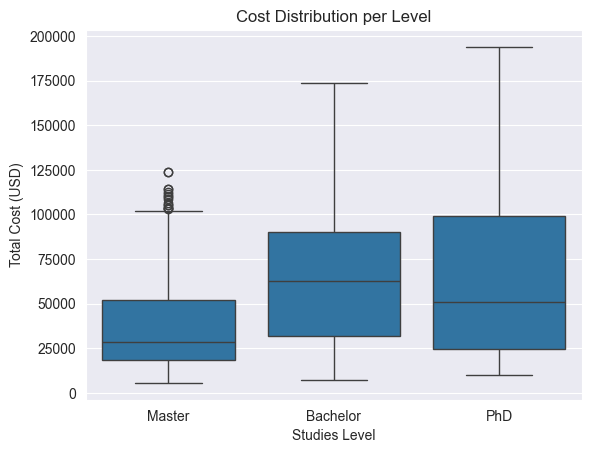

In [10]:

sns.boxplot(x="Level", y="Total_Cost", data=df)
plt.title("Cost Distribution per Level")
plt.xlabel("Studies Level")
plt.ylabel("Total Cost (USD)")
plt.show()

### - Analyze the country with the best quality education with fewer costs

In [11]:
efficency_score=1000 / (df["Tuition_USD"] + df["Living_Cost_Index"] * 100)
efficency_score.name="Efficiency_Score"

In [12]:
df["Efficiency_Score"]=efficency_score.round(4)
df

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Total_Cost,Efficiency_Score
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00,109860.0,0.0157
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79,64085.0,0.0205
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35,78035.0,0.0219
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52,76700.0,0.0204
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92,27525.0,0.1325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,France,Strasbourg,University of Strasbourg,Data Analytics,Master,2.0,4000,70.2,1000,99,850,0.92,28949.0,0.0907
903,Malaysia,Nilai,USIM,Computer Science,Bachelor,3.0,6800,50.5,400,120,400,4.65,21720.0,0.0844
904,Saudi Arabia,Al-Ahsa,King Faisal University,Information Systems,Master,2.0,4200,64.2,600,200,800,3.75,19600.0,0.0942
905,USA,Seattle,University of Washington,Software Development,PhD,5.0,50000,77.8,2000,160,1500,1.00,171660.0,0.0173


In [13]:
efficency_score.groupby(df.Country).sum().sort_values(ascending=False).round(2)

Country
Germany           4.74
Greece            2.74
UK                2.56
France            2.34
Canada            2.22
                  ... 
South Africa      0.09
Taiwan            0.09
Czech Republic    0.07
Israel            0.05
Hong Kong         0.03
Name: Efficiency_Score, Length: 71, dtype: float64

In [14]:
df.Efficiency_Score=pd.qcut(efficency_score,q=4,labels=["Low","Medium","Normal","High"])
df

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Total_Cost,Efficiency_Score
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00,109860.0,Low
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79,64085.0,Low
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35,78035.0,Low
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52,76700.0,Low
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92,27525.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,France,Strasbourg,University of Strasbourg,Data Analytics,Master,2.0,4000,70.2,1000,99,850,0.92,28949.0,Normal
903,Malaysia,Nilai,USIM,Computer Science,Bachelor,3.0,6800,50.5,400,120,400,4.65,21720.0,Normal
904,Saudi Arabia,Al-Ahsa,King Faisal University,Information Systems,Master,2.0,4200,64.2,600,200,800,3.75,19600.0,Normal
905,USA,Seattle,University of Washington,Software Development,PhD,5.0,50000,77.8,2000,160,1500,1.00,171660.0,Low


### -How the cost varies by the program

/var/folders/cb/yp5287ws4zbgvbcyhyvlt4kc0000gn/T/ipykernel_24346/3586711462.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_tuition.values, y=avg_tuition.index, palette="viridis")


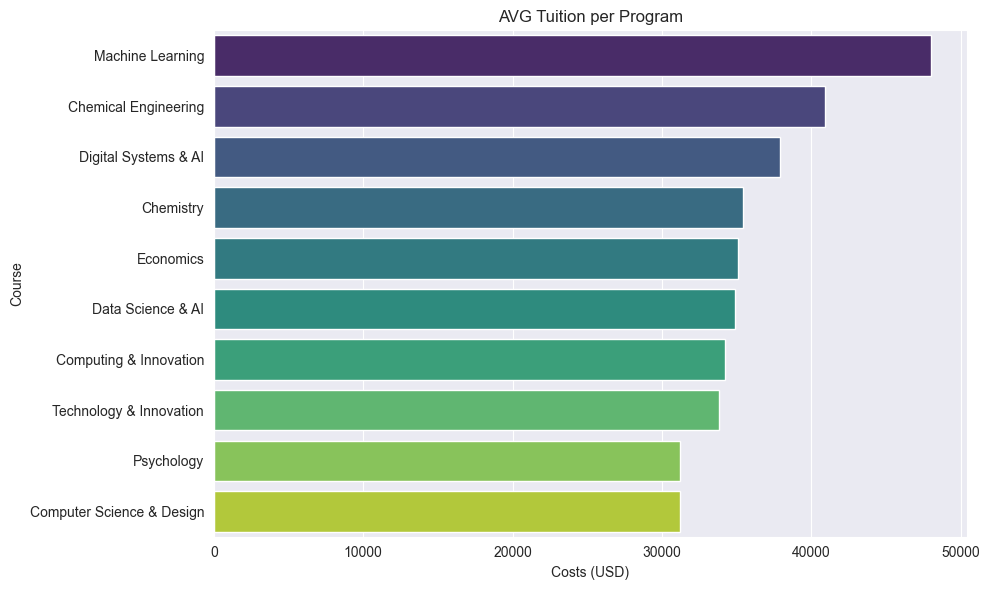

In [15]:
avg_tuition = df.groupby("Program")["Tuition_USD"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_tuition.values, y=avg_tuition.index, palette="viridis")
plt.xlabel("Costs (USD)")
plt.ylabel("Course")
plt.title("AVG Tuition per Program")
plt.tight_layout()
plt.show()

## Analyze the cost variance in a big country(USA)

### The average cost per city

In [16]:
usa_city=df[df['Country']=='USA'][['City','Program','Total_Cost']]
usa_city

,City,Program,Total_Cost
0,Cambridge,Computer Science,109860.0
19,Ann Arbor,Aerospace Engineering,140360.0
20,Atlanta,Industrial Engineering,127060.0
21,Austin,Chemical Engineering,119360.0
29,Stanford,Computer Science,193860.0
...,...,...,...
877,New York,Data Science,123660.0
884,Los Angeles,Computer Engineering,185660.0
891,Chicago,Artificial Intelligence,105260.0
898,San Francisco,Data Science,114260.0


In [17]:
avg_cost=usa_city.groupby('City')['Total_Cost'].mean().sort_values(ascending=False).round(2)
avg_cost

City
Stanford            187760.00
MIT                 183660.00
Baltimore           157260.00
New Haven           156960.00
Princeton           151660.00
Ithaca              147460.00
Los Angeles         147460.00
Cambridge           138860.00
Ann Arbor           137810.00
Seattle             137643.33
Atlanta             136785.00
San Diego           132660.00
Urbana-Champaign    131460.00
Nashville           129260.00
Berkeley            127560.00
Boston              124420.00
Minneapolis         123710.00
Philadelphia        122760.00
New York            120593.33
Madison             119910.00
Austin              114500.00
San Francisco       112760.00
Urbana              110460.00
Chicago             104193.33
Tempe               103460.00
Columbus            101660.00
Gainesville          97360.00
West Lafayette       95560.00
Pittsburgh           94460.00
College Station      91060.00
Corvallis            90560.00
Denver               89460.00
Raleigh              89310.00
Durha

### The distribution os the most expensive programs in USA

In [18]:
usa=df[df['Country']=='USA']

In [19]:
usa_sorted=usa.sort_values('Total_Cost', ascending=False)


In [20]:
top_expensive=usa_sorted.head(10)
top_expensive

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Total_Cost,Efficiency_Score
29,USA,Stanford,Stanford University,Computer Science,PhD,5.0,54200,89.5,2300,160,1500,1.0,193860.0,Low
402,USA,Stanford,Stanford University,Physics,PhD,5.0,52000,84.3,2300,160,1500,1.0,191660.0,Low
856,USA,Stanford,Stanford University,Computer Science,PhD,5.0,52000,84.3,2300,160,1500,1.0,191660.0,Low
30,USA,Boston,MIT,Electrical Engineering,PhD,5.0,53800,83.2,2200,160,1500,1.0,187460.0,Low
884,USA,Los Angeles,UCLA,Computer Engineering,PhD,5.0,52000,79.8,2200,160,1500,1.0,185660.0,Low
870,USA,MIT,Massachusetts,Robotics,PhD,5.0,56000,82.1,2100,160,1500,1.0,183660.0,Low
214,USA,Stanford,Stanford University,Computer Science,Bachelor,4.0,57000,95.2,2400,160,1500,1.0,173860.0,Low
432,USA,Seattle,University of Washington,Computer Science,PhD,5.0,50000,77.8,2000,160,1500,1.0,171660.0,Low
905,USA,Seattle,University of Washington,Software Development,PhD,5.0,50000,77.8,2000,160,1500,1.0,171660.0,Low
215,USA,Cambridge,MIT,Computer Science,Bachelor,4.0,55800,83.5,2300,160,1500,1.0,167860.0,Low


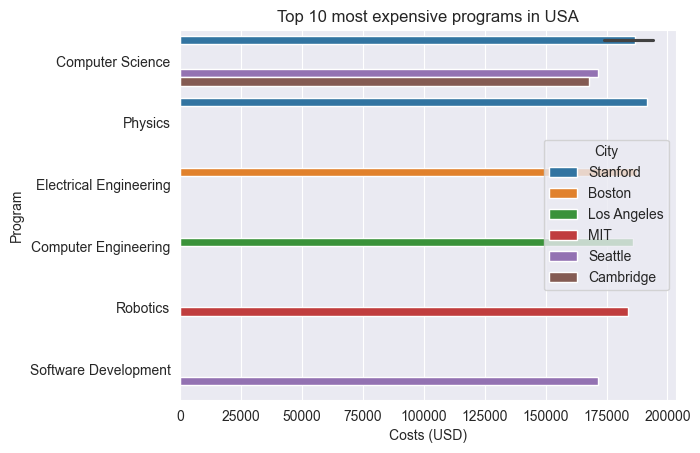

In [21]:
sns.barplot(data=top_expensive,x='Total_Cost', y='Program', hue='City')
plt.title("Top 10 most expensive programs in USA")
plt.xlabel("Costs (USD)")
plt.ylabel("Program")
plt.show()

---

## Which university has the cheapest tuition per duration

In [22]:
cost_per_year=(df['Total_Cost']/df['Duration_Years'])
cost_per_year.name="Cost_per_Year"

In [23]:
df["Cost_per_Year"]=cost_per_year

In [24]:
uni_cost=df.groupby('University')['Cost_per_Year'].mean().round(2)

In [25]:
uni_cost.sort_values(ascending=False).head(10)

University
Columbia University          60296.67
Imperial College London      56100.00
UC Berkeley Extension        55630.00
Harvard University           55580.00
Northeastern University      53030.00
University of Chicago        52096.67
University College London    50590.83
King's College London        49674.17
University of Salford        48285.00
UWE Bristol                  47485.00
Name: Cost_per_Year, dtype: float64

## What factors influence the most the total cost?



In [26]:
#the value that influence the cost
X=df[['Tuition_USD','Rent_USD','Insurance_USD','Visa_Fee_USD','Duration_Years','Living_Cost_Index']]
#the target alue
Y=df['Total_Cost']

In [27]:
#standardize the columns

scaler = StandardScaler()
#transform in a Normal ~ (0,1)
x_scaled = scaler.fit_transform(X)

In [28]:
model = LinearRegression()
#training the model with  standardize data and with the target
model.fit(x_scaled,Y)
#returns a score from 0-1 which show how good it is with the given data
model.score(x_scaled,Y)

96.92649429183187

In [29]:
#creates a dataframe with the features and it's coefficient
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

#if the coef is positive -> if the feature raises , the target also raises
#if it's negative -> the features raises , the target is lowering
coef_df

,Feature,Coefficient
1,Rent_USD,17461.056301
0,Tuition_USD,17048.772014
4,Duration_Years,11637.657148
2,Insurance_USD,1734.219964
3,Visa_Fee_USD,-58.526897
5,Living_Cost_Index,-585.947010
